# HM1: Logistic Regression.

### Name: [Ayomide Akinsanya]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [2]:
# Load Packages
import keras
import pandas as pd
import sklearn
import numpy 
import math
import os 

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [3]:
BREAST_CANCER_PATH = os.path.join("CS583 Deep Learning","Datasets","Breats Cancer")

def load_breast_cancer_data(breast_cancer_path=BREAST_CANCER_PATH):
    file_path = os.path.join(breast_cancer_path,"data.csv")
    return pd.read_csv(file_path)

In [4]:
breast_cancer = load_breast_cancer_data()    

## 1.2 Examine and clean data

In [5]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.


In [6]:
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
breast_cancer = breast_cancer.drop(["id","Unnamed: 32"],axis=1)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder= OrdinalEncoder()
breast_cancer_encoded = ordinal_encoder.fit_transform(breast_cancer[["diagnosis"]])
breast_cancer["diagnosis"] = breast_cancer_encoded
breast_cancer["diagnosis"].replace({0.0:-1,1.0:1},inplace=True)
breast_cancer["diagnosis"] = breast_cancer["diagnosis"].astype(int)

breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [10]:
def split_train_test(data, test_ratio):
    numpy.random.seed(42)
    random_indices = numpy.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = random_indices[:test_set_size]
    train_indices = random_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
train_set, test_set = split_train_test(breast_cancer,0.2)


In [12]:
train_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
265,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,...,32.490,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
68,-1,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,-1,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,-1,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,-1,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,-1,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [13]:
y_train = train_set["diagnosis"]
print(y_train)
y_test = test_set["diagnosis"]
print(y_test)

265    1
68    -1
181    1
63    -1
248   -1
      ..
71    -1
106   -1
270   -1
435    1
102   -1
Name: diagnosis, Length: 456, dtype: int64
204   -1
70     1
131    1
431   -1
540   -1
      ..
148   -1
486   -1
75     1
249   -1
238   -1
Name: diagnosis, Length: 113, dtype: int64


In [14]:
x_train = train_set.drop("diagnosis", axis=1)
print(x_train)
x_test = test_set.drop("diagnosis", axis=1)
print(x_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
265       20.730         31.12          135.70     1419.0          0.09469   
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [15]:
# Standardization
#import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).to_numpy().reshape(1, d)
sig = numpy.std(x_train, axis=0).to_numpy().reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean               -0.006887
texture_mean               0.092006
perimeter_mean            -0.001923
area_mean                 -0.016484
smoothness_mean            0.224187
compactness_mean           0.067151
concavity_mean            -0.012928
concave points_mean        0.073578
symmetry_mean              0.013289
fractal_dimension_mean     0.037788
radius_se                  0.025947
texture_se                 0.123422
perimeter_se              -0.007070
area_se                   -0.008893
smoothness_se              0.094418
compactness_se            -0.036193
concavity_se              -0.142046
concave points_se         -0.073795
symmetry_se               -0.009917
fractal_dimension_se      -0.040196
radius_worst              -0.001616
texture_worst              0.077232
perimeter_worst           -0.011414
area_worst                -0.017457
smoothness_worst           0.178731
compactness_worst          0.048756
concavity_worst           -0.061657
concave points_

In [16]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
265,1.862968,2.773941,1.795180,2.143314,-0.075698,0.203543,0.601279,1.002020,-0.152741,-0.833785,...,3.336917,3.516585,3.167434,4.403897,0.371113,0.075206,0.332366,0.791132,-0.058623,-0.094562
68,-1.440918,-0.438193,-1.362689,-1.139308,0.781536,0.719217,2.823755,-0.121348,1.094130,2.460482,...,-1.226353,-0.478037,-1.242402,-0.963709,0.722732,1.187855,4.676639,0.930641,2.099633,1.888605
181,1.964618,1.714099,2.082595,1.839913,1.321356,3.429369,2.013175,2.662741,2.129543,1.560531,...,2.141579,1.287029,2.053839,2.083974,0.761801,3.268981,1.929765,2.698272,1.893329,2.500625
63,-1.400258,-1.246468,-1.345854,-1.110092,-1.333838,-0.308120,-0.367131,-0.698681,1.932669,0.956396,...,-1.288075,-1.035426,-1.239729,-0.988930,-1.440809,-0.549325,-0.646268,-0.972360,0.598375,0.058162
248,-0.983213,1.399641,-0.984122,-0.868215,0.059617,-0.597852,-0.822089,-0.847289,0.313924,0.075888,...,-0.827221,1.565723,-0.871798,-0.737418,0.796528,-0.730349,-0.776433,-0.811541,0.799918,-0.134428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.480731,-1.064781,-1.362689,-1.157568,0.150307,0.944586,-0.037100,-0.516670,0.332153,3.757635,...,-1.345064,-1.615632,-1.329708,-1.033324,-0.471035,-0.059268,-0.628562,-1.018506,-1.033013,1.377653
106,-0.703678,-0.205261,-0.690138,-0.684208,1.328553,-0.037104,-0.230731,-0.355438,-0.036074,0.341152,...,-0.644114,0.599256,-0.648188,-0.623408,1.616972,0.085551,0.060071,0.115047,-0.157014,0.398984
270,0.044574,-0.556989,-0.068911,-0.065889,-2.263767,-1.468577,-1.030596,-1.107681,-1.104300,-1.247652,...,-0.279958,-0.803995,-0.383004,-0.342012,-1.991678,-1.308590,-1.129794,-1.241261,-0.709274,-1.272559
435,-0.042957,0.095221,-0.035243,-0.158876,0.738350,0.184444,0.297469,0.427842,-0.517323,0.374483,...,0.158264,0.850244,0.194878,-0.022958,1.291399,0.672584,0.632417,1.048687,0.434919,1.214822


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [17]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)

def objective(w, x, y, lam):
    n, d = x.shape
    y = y.reshape(n,1) # n-by-1 matrix
    y_x = y*x # n-by-d matrix
    y_x_w = numpy.dot(y_x, w) # n-by-1 matrix
    sum1 = numpy.exp(-y_x_w) # n-by-1 matrix
    sum2 = numpy.log(1 + sum1) # n-by-1 matrix
    sum3 = numpy.mean(sum2) # scalar
    regularization_param = lam / 2 * numpy.sum(w * w) # scalar
    loss = sum3 +regularization_param # scalar
    return loss

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [18]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n, d = x.shape
    y = y.reshape(n,1) # n-by-1 matrix
    y_x = y*x # n-by-d matrix
    y_x_w = numpy.dot(y_x, w) # n-by-1 matrix
    sum1 = numpy.exp(y_x_w) # n-by-1 matrix
    sum2 = numpy.divide(y_x, 1+sum1) # n-by-d matrix
    sum3 = -numpy.mean(sum2, axis=0).reshape(d, 1) # d-by-1 matrix
    grad = sum3 + lam * w # d-by-1 matrix
    return grad
    

In [19]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    n, d = x.shape
    numpy.random.seed(42) # using a random seed to obtain consistent values on each run
    w = numpy.random.randn(d,1) # Random initilization
    gd_loss_record = [] # store the objective values
    
    
    for i in range(max_epoch):
        loss = objective(w, x, y, lam)
        gd_loss_record.append(loss)
        grad = gradient(w, x, y, lam)
        w = w - learning_rate*grad
        print("Epoch", i+1,"/",max_epoch,"------>",loss)
        
    print("gd_loss_record",gd_loss_record)
    print("length of gd_loss_record ->",len(gd_loss_record))
    return w,gd_loss_record
    

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [20]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
gd_weights,gd_loss_record = gradient_descent(x_train_array,y_train_array,0,0.1,w,100)
print(gd_weights,gd_weights.shape)

Epoch 1 / 100 ------> 1.6900504384455077
Epoch 2 / 100 ------> 1.4753419148813591
Epoch 3 / 100 ------> 1.2936066134917032
Epoch 4 / 100 ------> 1.1403470774396498
Epoch 5 / 100 ------> 1.0109416270640443
Epoch 6 / 100 ------> 0.9020333304891125
Epoch 7 / 100 ------> 0.8109896917804706
Epoch 8 / 100 ------> 0.7350407709529481
Epoch 9 / 100 ------> 0.6713078401586887
Epoch 10 / 100 ------> 0.6174569075009695
Epoch 11 / 100 ------> 0.5717362923838056
Epoch 12 / 100 ------> 0.5327576095540021
Epoch 13 / 100 ------> 0.49938844667495574
Epoch 14 / 100 ------> 0.4707201176320212
Epoch 15 / 100 ------> 0.44602340526490064
Epoch 16 / 100 ------> 0.424684517782585
Epoch 17 / 100 ------> 0.40616134390981273
Epoch 18 / 100 ------> 0.38997732139938973
Epoch 19 / 100 ------> 0.3757288075940639
Epoch 20 / 100 ------> 0.3630840452143259
Epoch 21 / 100 ------> 0.3517739809535371
Epoch 22 / 100 ------> 0.3415815365552621
Epoch 23 / 100 ------> 0.33233211486636755
Epoch 24 / 100 ------> 0.32388547496456

In [21]:
x_train_array

array([[ 1.86296828,  2.77394061,  1.79517976, ...,  0.79113154,
        -0.05862331, -0.09456232],
       [-1.44091791, -0.43819334, -1.36268878, ...,  0.93064101,
         2.09963316,  1.88860526],
       [ 1.96461763,  1.71409946,  2.08259466, ...,  2.69827196,
         1.89332923,  2.5006247 ],
       ...,
       [ 0.04457438, -0.55698872, -0.06891114, ..., -1.24126078,
        -0.70927415, -1.27255938],
       [-0.042957  ,  0.09522122, -0.03524254, ...,  1.04868748,
         0.43491916,  1.21482239],
       [-0.55120375,  0.30486013, -0.60596641, ..., -0.61300825,
        -0.33475318, -0.8469532 ]])

In [22]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
gd_weights_reg,gd_loss_record_reg = gradient_descent(x_train_array,y_train_array,15,0.01,w,100)
print(gd_weights_reg,gd_weights_reg.shape)

Epoch 1 / 100 ------> 185.8323990196105
Epoch 2 / 100 ------> 134.31756501643886
Epoch 3 / 100 ------> 97.10932814729368
Epoch 4 / 100 ------> 70.2381673576664
Epoch 5 / 100 ------> 50.835816328300886
Epoch 6 / 100 ------> 36.82961964354647
Epoch 7 / 100 ------> 26.721733020338398
Epoch 8 / 100 ------> 19.42963512210921
Epoch 9 / 100 ------> 14.17094055244912
Epoch 10 / 100 ------> 10.38020899050756
Epoch 11 / 100 ------> 7.648847629491139
Epoch 12 / 100 ------> 5.681674330968635
Epoch 13 / 100 ------> 4.26550598936431
Epoch 14 / 100 ------> 3.246436956411373
Epoch 15 / 100 ------> 2.513404151822067
Epoch 16 / 100 ------> 1.9863011059935993
Epoch 17 / 100 ------> 1.607382308002041
Epoch 18 / 100 ------> 1.3350469845548476
Epoch 19 / 100 ------> 1.139343991404862
Epoch 20 / 100 ------> 0.9987222175755037
Epoch 21 / 100 ------> 0.8976827050505578
Epoch 22 / 100 ------> 0.8250836580947722
Epoch 23 / 100 ------> 0.7729179943348188
Epoch 24 / 100 ------> 0.7354325947097038
Epoch 25 / 100 --

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [23]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    
    xi = xi.reshape(1,30)
    y_x = yi * xi # 1-by-d matrix

    y_x_w = float(numpy.dot(y_x, w)) # scalar
    
    # calculate objective function Q_i
    loss = numpy.log(1 + numpy.exp(-y_x_w)) # scalar
    regularization_param = lam / 2 * numpy.sum(w * w) # scalar
    loss = loss + regularization_param
    
    # calculate stochastic gradient
    grad = -y_x.T / (1 + numpy.exp(y_x_w)) # d-by-1 matrix
    grad = grad + lam * w # d-by-1 matrix
    
    return loss, grad

In [42]:
a = numpy.random.randn(1,5)
b = numpy.random.randn(5,1)
c = numpy.dot(a,b)
c

array([[-1.37787111]])

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [24]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n, d = x.shape
    numpy.random.seed(42)
    w = numpy.random.randn(d,1) # Random initilization

    sgd_loss_record = [] # store the objective values
    
    for i in range(max_epoch):
        # randomly shuffle the samples
        random_indices = numpy.random.permutation(n)
        x_indices = x[random_indices, :]
        y_indices = y[random_indices]
        
        loss = 0 # accumulate the objective values
        for j in range(n):
            xi = x_indices[j, :] # 1-by-d matrix
            yi = (y_indices[j]) # scalar
            initial_loss, g = stochastic_objective_gradient(w, xi, yi, lam)
            loss = loss +initial_loss
            w = w - learning_rate*g
        
        #stepsize *= 0.9 # decrease step size
        loss = loss/n
        sgd_loss_record.append(loss)
        print("Epoch", i+1,"/",max_epoch,"------>",loss)
    print("sgd_loss_record",sgd_loss_record)
    print("length of sgd_loss_record ->",len(sgd_loss_record))
    return w, sgd_loss_record
    

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [25]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
sgd_weights,sgd_loss_record = sgd(x_train_array,y_train_array,0,0.1,w,100)
print(sgd_weights,sgd_weights.shape)

Epoch 1 / 100 ------> 0.2020103054530172
Epoch 2 / 100 ------> 0.08895907286582184
Epoch 3 / 100 ------> 0.07594480001833694
Epoch 4 / 100 ------> 0.073295522156909
Epoch 5 / 100 ------> 0.06370352294970562
Epoch 6 / 100 ------> 0.05919164928574551
Epoch 7 / 100 ------> 0.05913900437219594
Epoch 8 / 100 ------> 0.05826423717421941
Epoch 9 / 100 ------> 0.05858020484321446
Epoch 10 / 100 ------> 0.06087374696051452
Epoch 11 / 100 ------> 0.06293771620803511
Epoch 12 / 100 ------> 0.05445698157917128
Epoch 13 / 100 ------> 0.053315121661762645
Epoch 14 / 100 ------> 0.057631994248346335
Epoch 15 / 100 ------> 0.050641841539062996
Epoch 16 / 100 ------> 0.051386533592840206
Epoch 17 / 100 ------> 0.05216469953002802
Epoch 18 / 100 ------> 0.061976315120602074
Epoch 19 / 100 ------> 0.0597619170532856
Epoch 20 / 100 ------> 0.051821025717605225
Epoch 21 / 100 ------> 0.04936917098741923
Epoch 22 / 100 ------> 0.052384492101023826
Epoch 23 / 100 ------> 0.0486159093712775
Epoch 24 / 100 ---

In [26]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
sgd_weights_reg,sgd_loss_record_reg = sgd(x_train_array,y_train_array,15,0.01,w,100)
print(sgd_weights_reg,sgd_weights_reg.shape)

Epoch 1 / 100 ------> 2.1174582673141273
Epoch 2 / 100 ------> 0.651452825244891
Epoch 3 / 100 ------> 0.6507229485850108
Epoch 4 / 100 ------> 0.6508542158734975
Epoch 5 / 100 ------> 0.6516656759524048
Epoch 6 / 100 ------> 0.6515702683583343
Epoch 7 / 100 ------> 0.6531447224481479
Epoch 8 / 100 ------> 0.6515888104920866
Epoch 9 / 100 ------> 0.6521605135131062
Epoch 10 / 100 ------> 0.6507414039972977
Epoch 11 / 100 ------> 0.651773176228631
Epoch 12 / 100 ------> 0.6505534843631461
Epoch 13 / 100 ------> 0.6511694196438556
Epoch 14 / 100 ------> 0.6516675450707573
Epoch 15 / 100 ------> 0.6509198516853361
Epoch 16 / 100 ------> 0.6505152739123237
Epoch 17 / 100 ------> 0.6520661238697293
Epoch 18 / 100 ------> 0.6499299278412708
Epoch 19 / 100 ------> 0.6515206780196237
Epoch 20 / 100 ------> 0.6524881130418729
Epoch 21 / 100 ------> 0.6504869958406043
Epoch 22 / 100 ------> 0.6494789411560185
Epoch 23 / 100 ------> 0.6491191184428288
Epoch 24 / 100 ------> 0.6525495379160416
Epo

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [27]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: b-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    n, d = xi.shape
    yi = yi.reshape(n,1)
    y_x = numpy.multiply(yi, xi) # n-by-d matrix
    y_x_w = numpy.dot(y_x, w) # n-by-1 matrix
    sum1 = numpy.exp(-y_x_w) # n-by-1 matrix
    sum2 = numpy.log(1 + sum1) # n-by-1 matrix
    loss = numpy.mean(sum2) # scalar
    regularization_param = lam / 2 * numpy.sum(w * w) # scalar
    loss = loss+ regularization_param
    
    
    
    sum1 = numpy.exp(y_x_w) # n-by-1 matrix
    sum2 = numpy.divide(y_x, 1+sum1) # n-by-d matrix
    sum3 = -numpy.mean(sum2, axis=0).reshape(d, 1) # d-by-1 matrix
    grad= sum3 + lam * w
    
    return loss,grad

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [28]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    a,b = x.shape
    numpy.random.seed(42)
    w = numpy.random.randn(b,1)
    minibatch_size =50
    mbgd_loss_record = []
    for i in range(max_epoch):
        for j in range(math.ceil(a/minibatch_size)):
            shuffled_indices = numpy.random.permutation(minibatch_size)
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            loss,gradients = mb_objective_gradient(w, x_shuffled, 
                                                           y_shuffled, lam)
            
            #print("gradients.shape->",gradients.shape)
            w = w - learning_rate*gradients
            #print("w.shape->",w.shape)
        mbgd_loss_record.append(loss)
        print("Epoch", i+1,"/",max_epoch,"------>",loss)
    print("mbgd_loss_record",mbgd_loss_record)
    print("length of mbgd_loss_record ->",len(mbgd_loss_record))
    return w,mbgd_loss_record
    

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [29]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
mbgd_weights,mbgd_loss_record = mbgd(x_train_array,y_train_array,0,0.1,w,100)
print(mbgd_weights,mbgd_weights.shape)

Epoch 1 / 100 ------> 0.4371965052956125
Epoch 2 / 100 ------> 0.25446104271781167
Epoch 3 / 100 ------> 0.18591036728679747
Epoch 4 / 100 ------> 0.1497454339712611
Epoch 5 / 100 ------> 0.12768801312966852
Epoch 6 / 100 ------> 0.11305590107666658
Epoch 7 / 100 ------> 0.10266389115019908
Epoch 8 / 100 ------> 0.09481304664830492
Epoch 9 / 100 ------> 0.08855390110083226
Epoch 10 / 100 ------> 0.08334107449972171
Epoch 11 / 100 ------> 0.07885274694691162
Epoch 12 / 100 ------> 0.07489311301769887
Epoch 13 / 100 ------> 0.07133889188762761
Epoch 14 / 100 ------> 0.06810950917201897
Epoch 15 / 100 ------> 0.06515013476545531
Epoch 16 / 100 ------> 0.06242182312538138
Epoch 17 / 100 ------> 0.059895663076486194
Epoch 18 / 100 ------> 0.05754924343998422
Epoch 19 / 100 ------> 0.05536448521159504
Epoch 20 / 100 ------> 0.05332629489503787
Epoch 21 / 100 ------> 0.05142171813629938
Epoch 22 / 100 ------> 0.04963940099174227
Epoch 23 / 100 ------> 0.04796924129029054
Epoch 24 / 100 ------

In [30]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
mbgd_weights_reg,mbgd_loss_record_reg = mbgd(x_train_array,y_train_array,15,0.01,w,100)
print(mbgd_weights_reg,mbgd_weights_reg.shape)

Epoch 1 / 100 ------> 10.339896406427007
Epoch 2 / 100 ------> 0.9746487431324338
Epoch 3 / 100 ------> 0.6309744988862965
Epoch 4 / 100 ------> 0.6183631746767992
Epoch 5 / 100 ------> 0.6178955323121096
Epoch 6 / 100 ------> 0.6178780474499295
Epoch 7 / 100 ------> 0.6178773896247677
Epoch 8 / 100 ------> 0.6178773647601973
Epoch 9 / 100 ------> 0.6178773638170671
Epoch 10 / 100 ------> 0.6178773637811984
Epoch 11 / 100 ------> 0.6178773637798316
Epoch 12 / 100 ------> 0.6178773637797794
Epoch 13 / 100 ------> 0.6178773637797773
Epoch 14 / 100 ------> 0.6178773637797773
Epoch 15 / 100 ------> 0.6178773637797774
Epoch 16 / 100 ------> 0.6178773637797773
Epoch 17 / 100 ------> 0.6178773637797773
Epoch 18 / 100 ------> 0.6178773637797773
Epoch 19 / 100 ------> 0.6178773637797774
Epoch 20 / 100 ------> 0.6178773637797773
Epoch 21 / 100 ------> 0.6178773637797774
Epoch 22 / 100 ------> 0.6178773637797773
Epoch 23 / 100 ------> 0.6178773637797772
Epoch 24 / 100 ------> 0.6178773637797774
E

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

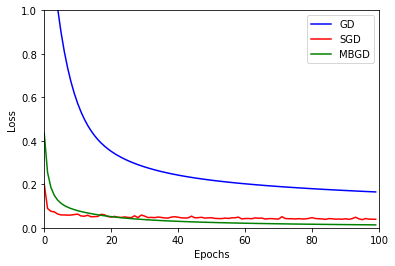

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(7,4))
epochs = range(100)
plt.plot(epochs,gd_loss_record,'b',label='GD')
plt.plot(epochs,sgd_loss_record,'r',label='SGD')
plt.plot(epochs,mbgd_loss_record,'g',label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 100, 0, 1.0])
plt.legend()
plt.show()


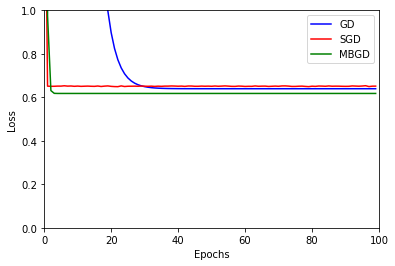

In [32]:
#Plot with Regularization

epochs = range(100)
plt.plot(epochs,gd_loss_record_reg,'b',label='GD')
plt.plot(epochs,sgd_loss_record_reg,'r',label='SGD')
plt.plot(epochs,mbgd_loss_record_reg,'g',label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 100, 0, 1])
plt.legend()
plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [33]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    predict =X.T*w
    print("predict.shape->", predict.shape)
    predict =predict.sum(axis=0)
    print("predict.shape->", predict.shape)
    predict[predict>0] = 1
    predict[predict<0] = -1
    return predict

In [34]:
# evaluate training error of logistric regression and regularized version
predictions = predict(gd_weights,x_train_array)
accuracy = numpy.mean(predictions == y_train_array) * 100
print('\nTraining Set Accuracy:',accuracy);
print('\nTraining Set Error Rate:', 100- accuracy);
print('\nTraining Set Classification Errors:',math.ceil((1-accuracy/100)*len(y_train_array)) );



predict.shape-> (30, 456)
predict.shape-> (456,)

Training Set Accuracy: 92.54385964912281

Training Set Error Rate: 7.456140350877192

Training Set Classification Errors: 35


In [35]:
predictions_reg = predict(gd_weights_reg,x_train_array)

accuracy = numpy.mean(predictions_reg == y_train_array) * 100
print('\nTraining Set With Regularization Accuracy:',accuracy);
print('\nTraining Set With Regularization Error Rate:', 100- accuracy);
print('\nTraining Set With Regularization Classification Errors:',math.ceil((1-accuracy/100)*len(y_train_array)) );



predict.shape-> (30, 456)
predict.shape-> (456,)

Training Set With Regularization Accuracy: 92.98245614035088

Training Set With Regularization Error Rate: 7.017543859649123

Training Set With Regularization Classification Errors: 32


In [36]:
# evaluate testing error of logistric regression and regularized version
test_predictions = predict(gd_weights,x_test)
accuracy = numpy.mean(test_predictions == y_test) * 100
print('\nTest Set Accuracy:',accuracy);
print('\nTest Set Error Rate:', 100- accuracy);
print('\nTest Set Classification Errors:',math.ceil((1-accuracy/100)*len(y_train_array)) );


predict.shape-> (30, 113)
predict.shape-> (113,)

Test Set Accuracy: 94.69026548672566

Test Set Error Rate: 5.309734513274336

Test Set Classification Errors: 25


In [37]:
test_predictions_reg = predict(gd_weights_reg,x_test)
accuracy = numpy.mean(test_predictions_reg == y_test) * 100
print('\nTest Set Accuracy with Regularization :',accuracy);
print('\nTest Set Error Rate with Regularization:', 100- accuracy);
print('\nTest Set Classification Errors with Regularization:',math.ceil((1-accuracy/100)*len(y_train_array)) );

predict.shape-> (30, 113)
predict.shape-> (113,)

Test Set Accuracy with Regularization : 96.46017699115043

Test Set Error Rate with Regularization: 3.5398230088495666

Test Set Classification Errors with Regularization: 17


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [38]:
#GD parrameter Tunning
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
gd_weights_reg,gd_loss_record_reg = gradient_descent(x_train_array,y_train_array,10,0.01,w,100)
print(gd_weights_reg,gd_weights_reg.shape)

Epoch 1 / 100 ------> 124.45161615922218
Epoch 2 / 100 ------> 100.83475385352784
Epoch 3 / 100 ------> 81.7102697605031
Epoch 4 / 100 ------> 66.22482724297049
Epoch 5 / 100 ------> 53.68717103560218
Epoch 6 / 100 ------> 43.537323903929604
Epoch 7 / 100 ------> 35.32163751331024
Epoch 8 / 100 ------> 28.672585518252927
Epoch 9 / 100 ------> 23.292398460904526
Epoch 10 / 100 ------> 18.93981133139054
Epoch 11 / 100 ------> 15.419333066272177
Epoch 12 / 100 ------> 12.572559013402076
Epoch 13 / 100 ------> 10.271137606193143
Epoch 14 / 100 ------> 8.411075500319537
Epoch 15 / 100 ------> 6.908124882862803
Epoch 16 / 100 ------> 5.694045459633097
Epoch 17 / 100 ------> 4.713573766455173
Epoch 18 / 100 ------> 3.9219651882652955
Epoch 19 / 100 ------> 3.28300034041624
Epoch 20 / 100 ------> 2.767368281767032
Epoch 21 / 100 ------> 2.3513555372851864
Epoch 22 / 100 ------> 2.0157831769053907
Epoch 23 / 100 ------> 1.7451450140713938
Epoch 24 / 100 ------> 1.5269088478836377
Epoch 25 / 100

In [39]:
#SGD Parameter Tunning
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
sgd_weights_reg,sgd_loss_record_reg = sgd(x_train_array,y_train_array,10,0.01,w,100)
print(sgd_weights_reg,sgd_weights_reg.shape)

Epoch 1 / 100 ------> 2.0584968167438484
Epoch 2 / 100 ------> 0.6294958999808085
Epoch 3 / 100 ------> 0.628520384539605
Epoch 4 / 100 ------> 0.6293784085557854
Epoch 5 / 100 ------> 0.6298367300819923
Epoch 6 / 100 ------> 0.6296811514415074
Epoch 7 / 100 ------> 0.6313440958612698
Epoch 8 / 100 ------> 0.6299151796750977
Epoch 9 / 100 ------> 0.6303145405950232
Epoch 10 / 100 ------> 0.6290827111256909
Epoch 11 / 100 ------> 0.6295988707372036
Epoch 12 / 100 ------> 0.62881135445401
Epoch 13 / 100 ------> 0.6292201371943082
Epoch 14 / 100 ------> 0.6298679042811525
Epoch 15 / 100 ------> 0.6292306798109196
Epoch 16 / 100 ------> 0.6288794198280294
Epoch 17 / 100 ------> 0.6304807207617374
Epoch 18 / 100 ------> 0.6281352689938791
Epoch 19 / 100 ------> 0.6291569009516619
Epoch 20 / 100 ------> 0.6307999704927495
Epoch 21 / 100 ------> 0.6282775155463596
Epoch 22 / 100 ------> 0.6279108311666506
Epoch 23 / 100 ------> 0.6269446734169175
Epoch 24 / 100 ------> 0.6309673728963113
Epoc

In [40]:
#MBGD parameter Tunning
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()
w = numpy.ones((30,1))
mbgd_weights_reg,mbgd_loss_record_reg = mbgd(x_train_array,y_train_array,10,0.01,w,100)
print(mbgd_weights_reg,mbgd_weights_reg.shape)

Epoch 1 / 100 ------> 18.87208318824271
Epoch 2 / 100 ------> 2.73180985220011
Epoch 3 / 100 ------> 0.838492394853013
Epoch 4 / 100 ------> 0.6198808968356218
Epoch 5 / 100 ------> 0.5945208719315535
Epoch 6 / 100 ------> 0.5915548375381656
Epoch 7 / 100 ------> 0.5912056079118679
Epoch 8 / 100 ------> 0.5911642757153739
Epoch 9 / 100 ------> 0.5911593645668601
Epoch 10 / 100 ------> 0.5911587792447626
Epoch 11 / 100 ------> 0.591158709321209
Epoch 12 / 100 ------> 0.5911587009527722
Epoch 13 / 100 ------> 0.591158699949797
Epoch 14 / 100 ------> 0.5911586998294496
Epoch 15 / 100 ------> 0.5911586998149955
Epoch 16 / 100 ------> 0.5911586998132581
Epoch 17 / 100 ------> 0.5911586998130491
Epoch 18 / 100 ------> 0.591158699813024
Epoch 19 / 100 ------> 0.5911586998130209
Epoch 20 / 100 ------> 0.5911586998130206
Epoch 21 / 100 ------> 0.5911586998130206
Epoch 22 / 100 ------> 0.5911586998130205
Epoch 23 / 100 ------> 0.5911586998130206
Epoch 24 / 100 ------> 0.5911586998130207
Epoch 25